<a href="https://colab.research.google.com/github/christienatashiaarchie/Pneumonia-Detection/blob/master/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

%matplotlib inline

In [4]:
# DIR Constants
cwd = os.getcwd()
TRAIN=cwd+'/PneumCovid/train/'
TEST=cwd+'/PneumCovid/test/'
VAL=cwd+'/PneumCovid/val/'

In [5]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('pneumonia') clas and 1 for ('covid') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN,
    target_size = (300,300),
    batch_size = 163,
    color_mode="rgb",
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    TEST,
    target_size = (300, 300),
    batch_size = 156,
    color_mode="rgb",
    class_mode = 'binary'
)

Found 3862 images belonging to 2 classes.
Found 969 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
10/10 [==============================] - 141s 14s/step - loss: 0.7331 - accuracy: 0.7374 - val_loss: 0.3742 - val_accuracy: 0.8813
Epoch 2/10
10/10 [==============================] - 135s 13s/step - loss: 0.3803 - accuracy: 0.8883 - val_loss: 0.3104 - val_accuracy: 0.8813
Epoch 3/10
10/10 [==============================] - 167s 17s/step - loss: 0.2953 - accuracy: 0.8890 - val_loss: 0.2180 - val_accuracy: 0.8916
Epoch 4/10
10/10 [==============================] - 119s 12s/step - loss: 0.2396 - accuracy: 0.9031 - val_loss: 0.2053 - val_accuracy: 0.9030
Epoch 5/10
10/10 [==============================] - 136s 14s/step - loss: 0.7042 - accuracy: 0.8525 - val_loss: 0.5678 - val_accuracy: 0.9009
Epoch 6/10
10/10 [==============================] - 132s 13s/step - loss: 0.1891 - accuracy: 0.9368 - val_loss: 0.1277 - val_accuracy: 0.9556
Epoch 7/10
10/10 [==============================] - 138s 14s/step - loss: 0.1053 - accuracy: 0.9633 - val_loss: 0.0830 - val_accuracy: 0.9732
Epoch 

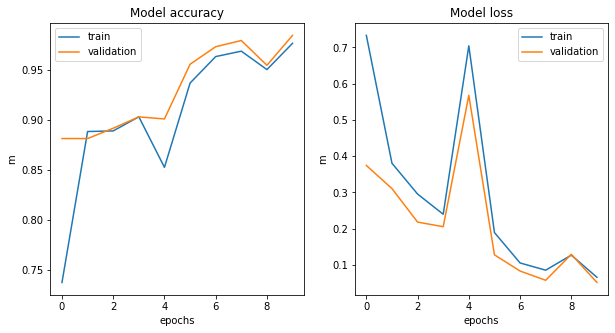

In [9]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(history.history[m])
  ax[i].plot(history.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'validation'])
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [10]:
# load new unseen dataset
test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    VAL,
    target_size = (300, 300),
    batch_size = 1, 
    color_mode="rgb",
    class_mode = 'binary'
)

eval_result = model.evaluate(test_generator)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 16 images belonging to 2 classes.
16/16 [==============================] - 1s 36ms/step - loss: 0.1847 - accuracy: 0.8750
loss rate at evaluation data : 0.18469171226024628
accuracy rate at evaluation data : 0.875


[0.]
COVID19(575).jpg is covid19 pneumonia


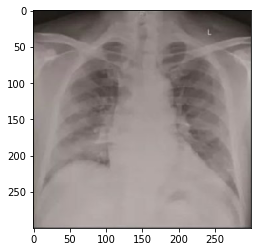

In [12]:
tfile = 'COVID19(575).jpg'
path = 'PneumCovid/predict/'+tfile

img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
print(classes[0])
if classes[0]> 0.5:
    print(tfile + ' is pneumonia')
    plt.imshow(img)
else:
    print(tfile + ' is covid19 pneumonia')
    plt.imshow(img)